# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Business objective:**
    
- Help a used car dealership to serve their customers better by knowing what their customers look for.
- Not only help customer to find what they need within their budget, but also aim to improve customer satisfaction.

*How:*

- Use the 'used car' inventory and build appropriate ML model that generates recommendation of valuable features in the car that drives cost.
- Handover the recommendation list to the used car dealership to serve their customers.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [374]:
# Let's read the provided raw data from csv into a dataframe

import pandas as pd
vehicles = pd.read_csv('./data/vehicles.csv')
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [375]:
# Let's do some basic sanity checks such as listing columns, knowing data type of columns, presence of null & zero values, etc.

vehicles.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [376]:
# find data types of the columns

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [377]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [378]:
# count null values by columns

vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [379]:
vehicles.shape

(426880, 18)

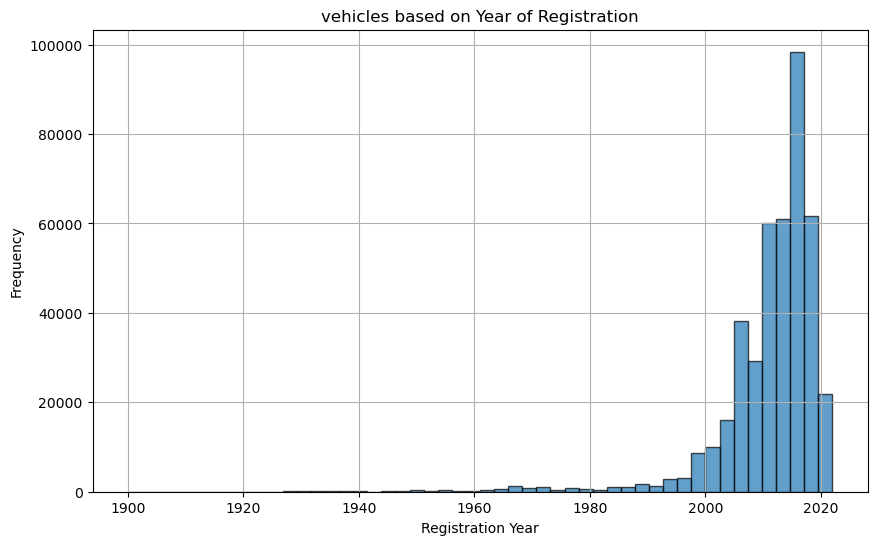

In [380]:
# Lets run a plot to see how vehicles are distributed by year, this will give an idea of where more vehicles belong

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(vehicles['year'], bins=50, edgecolor='black', alpha=0.7)
plt.title('vehicles based on Year of Registration')
plt.xlabel('Registration Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('images/histogram.png')
plt.show()

**Observation**

- There is a total of 18 columns and 426K rows
- Majority of columns has data type as 'object' and requires a change before analysis/prediction
- There is a overwhelming number of missing values, so we cannot drop the rows, rather, requires some sort of imputation to address

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [381]:
# As a first step, address the column data types by converting them to appropriate ones.

vehicles2 = vehicles.convert_dtypes()
vehicles2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            426880 non-null  Int64 
 1   region        426880 non-null  string
 2   price         426880 non-null  Int64 
 3   year          425675 non-null  Int64 
 4   manufacturer  409234 non-null  string
 5   model         421603 non-null  string
 6   condition     252776 non-null  string
 7   cylinders     249202 non-null  string
 8   fuel          423867 non-null  string
 9   odometer      422480 non-null  Int64 
 10  title_status  418638 non-null  string
 11  transmission  424324 non-null  string
 12  VIN           265838 non-null  string
 13  drive         296313 non-null  string
 14  size          120519 non-null  string
 15  type          334022 non-null  string
 16  paint_color   296677 non-null  string
 17  state         426880 non-null  string
dtypes: Int64(4), string(14)


In [382]:
# Let's remove a few columns (id, region, VIN) that are not useful for prediction.

vehicles2.drop(columns=['id','region','VIN'], inplace=True)

In [383]:
# Addressing the null values is the next step. Let's remove the null values from columns that has minimal null count.

vehicles2.dropna(subset=['year','model','fuel','odometer','title_status','transmission'], inplace=True)
vehicles2.isnull().sum()

price                0
year                 0
manufacturer     15990
model                0
condition       162527
cylinders       169060
fuel                 0
odometer             0
title_status         0
transmission         0
drive           121945
size            288110
type             88729
paint_color     118219
state                0
dtype: int64

In [384]:
vehicles2.shape

(405594, 15)

- Replaced all the null categorical values into a constant speicifc to the column

In [385]:
# All null values replaces with unique constant

vehicles2['manufacturer'].fillna('unknown_manufacturer', inplace=True)
vehicles2['condition'].fillna('unknown_condition', inplace=True)
vehicles2['cylinders'].fillna('unknown_cylinders', inplace=True)
vehicles2['drive'].fillna('unknown_drive', inplace=True)
vehicles2['size'].fillna('unknown_size', inplace=True)
vehicles2['type'].fillna('unknown_type', inplace=True)
vehicles2['paint_color'].fillna('unknown_paint_color', inplace=True)

In [386]:
# The dataframe now shows no null values

vehicles2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [387]:
# eliminating thresholds

car_price_max_thresold = 100000
vehicles2 = vehicles2[vehicles2['odometer']<=car_price_max_thresold]

In [388]:
vehicles2.shape

(236816, 15)

In [389]:
# eliminating thresholds

odometer_max_thresold = 300000
vehicles2 = vehicles2[vehicles2['odometer']<=odometer_max_thresold]

In [390]:
vehicles2.shape

(236816, 15)

In [391]:
vehicles2['price'].value_counts().sort_values(ascending=False).head()

0        20679
29990     2493
25990     2163
27990     2086
30990     1906
Name: price, dtype: Int64

In [392]:
# Let's update the price '0' with mean value. Let's also apply this logic for upto price '10' as the count for this low range is high and the value is practically unlikely.

import numpy as np
vehicles2['price'] = np.where(vehicles2['price'] <= 10, round(vehicles2['price'].mean()), vehicles2['price'])

**Target Encoding**

In [393]:
# Let's use target encoding technique to compare the categorical column with the target and replace values with appropriate mean values

vehicles2['fuel_encoded'] = vehicles2.groupby("fuel")["price"].transform("mean")
vehicles2['fuel']=round(vehicles2['fuel_encoded']).astype(int)
vehicles2.drop(columns='fuel_encoded', inplace=True)

vehicles2['condition_encoded'] = vehicles2.groupby("condition")["price"].transform("mean")
vehicles2['condition']=round(vehicles2['condition_encoded']).astype(int)
vehicles2.drop(columns='condition_encoded', inplace=True)

vehicles2['model_encoded'] = vehicles2.groupby("model")["price"].transform("mean")
vehicles2['model']=round(vehicles2['model_encoded']).astype(int)
vehicles2.drop(columns='model_encoded', inplace=True)

vehicles2['manufacturer_encoded'] = vehicles2.groupby("manufacturer")["price"].transform("mean")
vehicles2['manufacturer']=round(vehicles2['manufacturer_encoded']).astype(int)
vehicles2.drop(columns='manufacturer_encoded', inplace=True)

vehicles2['title_status_encoded'] = vehicles2.groupby("title_status")["price"].transform("mean")
vehicles2['title_status']=round(vehicles2['title_status_encoded']).astype(int)
vehicles2.drop(columns='title_status_encoded', inplace=True)

vehicles2['transmission_encoded'] = vehicles2.groupby("transmission")["price"].transform("mean")
vehicles2['transmission']=round(vehicles2['transmission_encoded']).astype(int)
vehicles2.drop(columns='transmission_encoded', inplace=True)

vehicles2['drive_encoded'] = vehicles2.groupby("drive")["price"].transform("mean")
vehicles2['drive']=round(vehicles2['drive_encoded']).astype(int)
vehicles2.drop(columns='drive_encoded', inplace=True)

vehicles2['type_encoded'] = vehicles2.groupby("type")["price"].transform("mean")
vehicles2['type']=round(vehicles2['type_encoded']).astype(int)
vehicles2.drop(columns='type_encoded', inplace=True)

vehicles2['paint_color_encoded'] = vehicles2.groupby("paint_color")["price"].transform("mean")
vehicles2['paint_color']=round(vehicles2['paint_color_encoded']).astype(int)
vehicles2.drop(columns='paint_color_encoded', inplace=True)

vehicles2['state_encoded'] = vehicles2.groupby("state")["price"].transform("mean")
vehicles2['state']=round(vehicles2['state_encoded']).astype(int)
vehicles2.drop(columns='state_encoded', inplace=True)

vehicles2.drop(columns=['cylinders','size'], inplace=True)

vehicles2.head()

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,33590,2014,35370,35225,28718,59827,57923,56626,31611,112379,34636,32785,62988
28,22590,2010,37091,34282,28718,59827,71229,56626,31611,112379,34636,25635,62988
29,39590,2020,37091,34669,28718,59827,19160,56626,31611,112379,34636,32677,62988
30,30990,2017,27247,34749,28718,59827,41124,56626,31611,112379,34636,32677,62988
32,27990,2012,35370,29033,28718,59827,68696,56626,31611,33736,34636,29048,62988


In [394]:
# data type change

vehicles2['price'] = vehicles2['price'].astype(int)

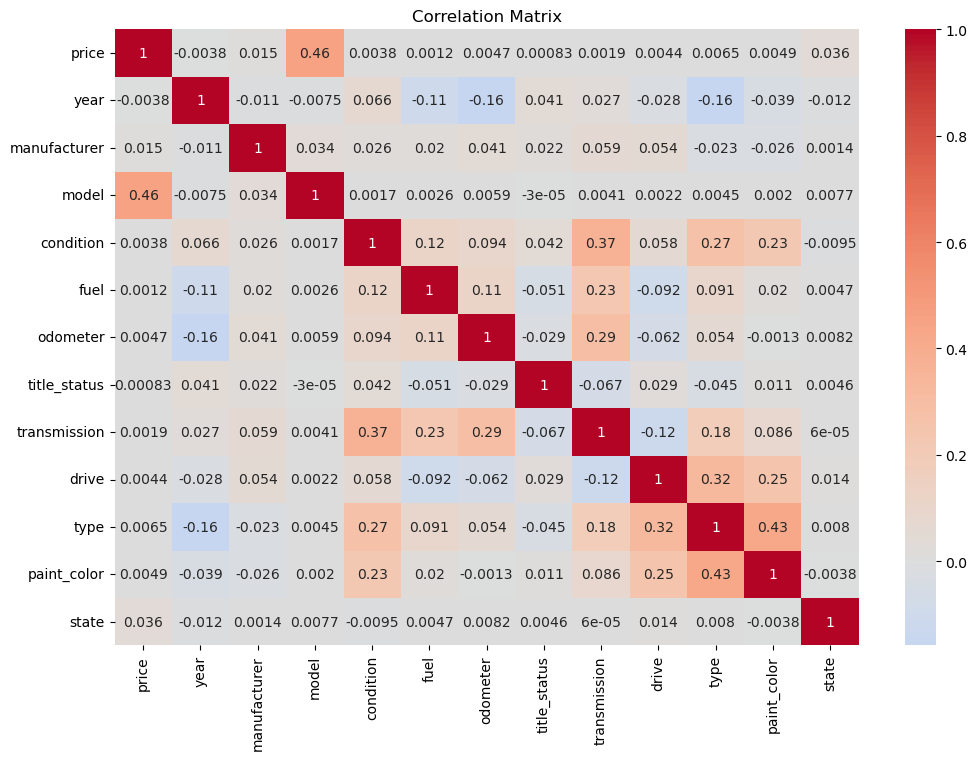

In [395]:
# Determine coorelation between features using corr function and plotting in a heat map for better readability

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(vehicles2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Above graph shows model is highly correlated with price.

**Recursive Feature Elimination (RFE)**

- Helps eliminate less important features

In [396]:
# creating a function to split and return the data into train and test sets

from sklearn.model_selection import train_test_split

def split_data(df):
    X = vehicles2.drop('price', axis=1)
    y = vehicles2['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [397]:
# passing the dataset for split process

X_train, X_test, y_train, y_test = split_data(vehicles2)

In [398]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# instantiate
model = LinearRegression()

# pick 5 features
rfe_selector = RFE(model, n_features_to_select=5)

# fit the model
rfe_selector.fit(X_train, y_train)

selected_features = X_train.columns[rfe_selector.support_]

print(selected_features)

Index(['year', 'model', 'odometer', 'transmission', 'state'], dtype='object')


**Scale using Standard Scaler, decompose using PCA**

Helps scale numerical columns and build a dataframe after transforming from scaled columns

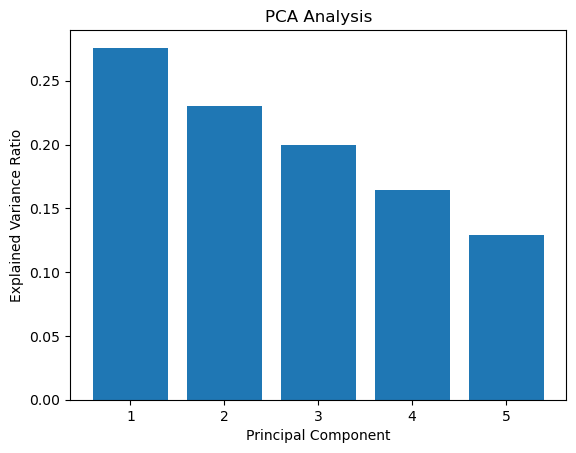

In [399]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# pick the numerical columns
n_columns = ['price', 'year', 'odometer', 'drive', 'type']

# instantiate scaler & fit the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(vehicles2[n_columns])

# instantiate princial component analysis & fit scaled data
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Analysis')
plt.show()

In [400]:
explained_variance_ratio

array([0.27587375, 0.23017225, 0.19994797, 0.16466142, 0.12934461])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Linear Regression Model**

In [401]:
# dropping additional columns that are not much useful for analysis

vehicles3 = vehicles2.drop(columns=['manufacturer','condition','fuel','title_status','drive','type','paint_color'])

In [402]:
vehicles3.head()

,price,year,model,odometer,transmission,state
27,33590,2014,35225,57923,31611,62988
28,22590,2010,34282,71229,31611,62988
29,39590,2020,34669,19160,31611,62988
30,30990,2017,34749,41124,31611,62988
32,27990,2012,29033,68696,31611,62988


In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# create train and test sets

X = vehicles3.drop('price', axis=1)
y = vehicles3['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

# training
lin_reg.fit(X_train, y_train)

# prediction
lin_reg_predict = lin_reg.predict(X_test)

# find mse error metric
lin_reg_mse = mean_squared_error(y_test, lin_reg_predict)

print("MSE:", lin_reg_mse)

y_test, lin_reg_predict

MSE: 414561029857077.6


(30330      6999
 29898     50543
 159989    38990
 364476    29912
 375630    50543
           ...  
 101777    45998
 420405    19995
 11975     37590
 116681     6500
 325398    44589
 Name: price, Length: 47364, dtype: int64,
 array([-55085.92070361,  37770.85165465,  -1751.61712125, ...,
         14196.91059465, -63194.31476757,   9262.96417631]))

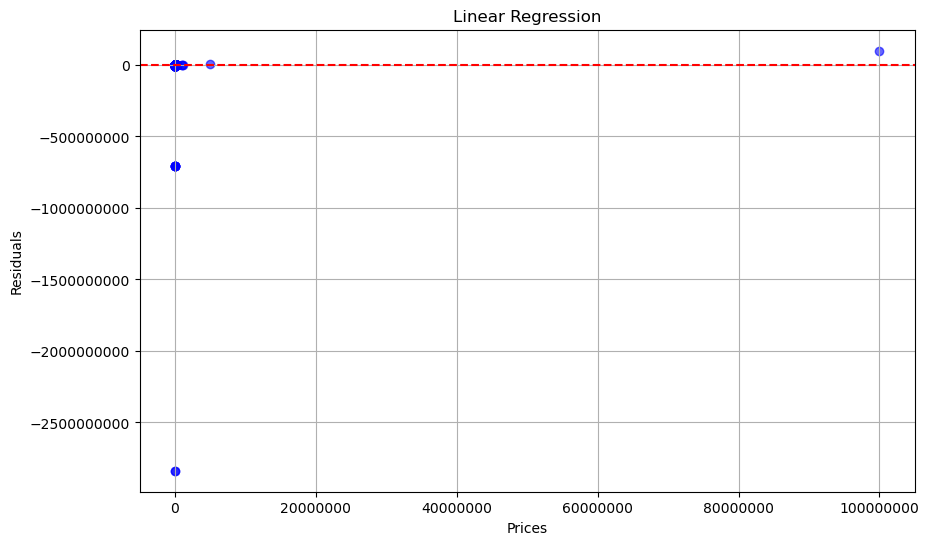

In [404]:
# determine residuals
lin_reg_residual = y_test - lin_reg_predict

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lin_reg_residual, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Linear Regression")
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.show()

**Polynomial Features**

In [405]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# instantiate
poly = PolynomialFeatures(degree=2)

# create polynomial features
X_poly = poly.fit_transform(vehicles3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# instantiate and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# R**2
r2 = r2_score(y_test, y_pred)
print(f"R**2: {r2}")

MSE: 16742.92221878973
R**2: 0.9999999209792655


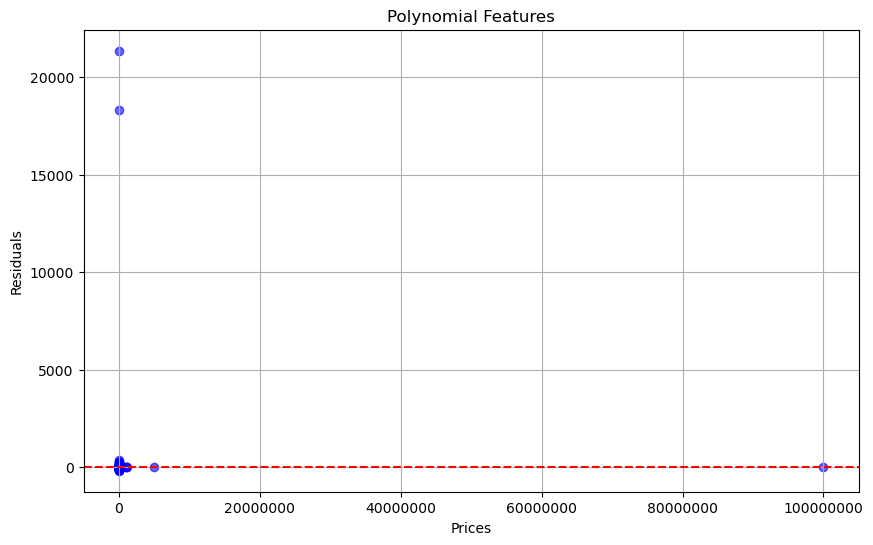

In [406]:
# residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Polynomial Features")
plt.xlabel("Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Cross Validaition using Linear Regression Model**

In [409]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# set folds
n_folds = 5

X = vehicles3
y = vehicles3['price']

# instantiate model
lin_reg_model = LinearRegression()

# instantiate metric
scorer = make_scorer(mean_squared_error)

# K-Fold Cross Validation for Linear Regression model
lin_reg_scores = cross_val_score(lin_reg_model, X, y, cv=n_folds, scoring=scorer)
lin_reg_mse = lin_reg_scores.mean()

print("CV Mean Squared Error:", lin_reg_mse)

CV Mean Squared Error: 2.271415425875172e-15


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Initially, through correlation, we could say 'model' is strongly correlated to the 'price' and could be a primary factor for used car price.

Also, through RFE process, we could arrive at the following features as most impactful ones among all for price determination Those are year, model, odometer, tramission and state.

**Evaluation & Outcomes**

In the model building process, we did use Linear Regression model and Polynomial Features. We did determine mean squared error (
MSE: 414561029857077.6) but that was too high and unusual for the data used. We also determined mean squared error and R square using ploynomial features. They were MSE: 16742.92221878973, R**2: 0.9999999209792655.

We have determined the residuals in each approach and plotted it against the prices. The values in the graph were a bit abnormal. 

For evaluation, we have used the Cross Validation technique. It produced mean square error of 2.27e-15. There are other techniques available as well. 

**Next Steps**

Dataset required a lot of cleaning. It required techniques to impute the missing data. We did use target encoding with mean values. It doesn't appear to be the best approach. We need to try out different techniques to handle the missing values, as data preparation is the key for success.

Assumptions made to replace impossible values such as 0 price, 0 odometer were replaced with mean values and that could be impacting the results. Need to find another alternate technique.

One of the primary challenge was handling the categorical features. We had a many categorical features and especially few had several distinct values with no ordinal values. This has prevented using tehcniques such as one hot encoding but rather forced to use target encoding. One of the drawbacks was overfitting. We have to explore more to find a best technique to handle categorical features.